# Lab 5

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### Import

In [17]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
#from preprocessing import parse_aug_fn, parse_fn

## Activation Function 激活函數

1. ReLU

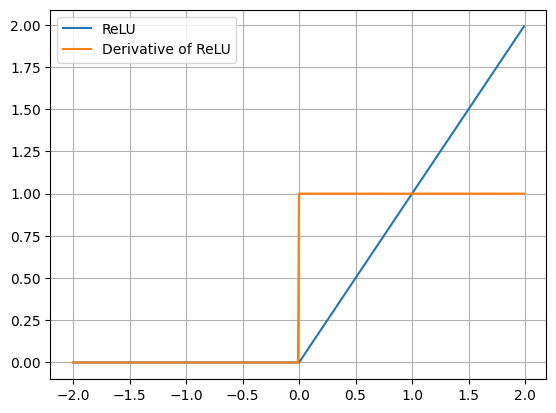

In [18]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='ReLU')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of ReLU')
plt.grid(True)
plt.legend(loc='upper left')

2. Sigmoid

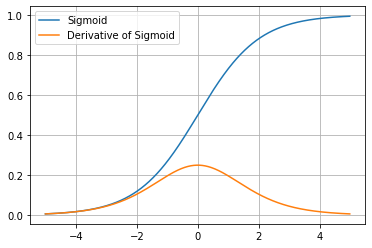

In [ ]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

3. Tanh

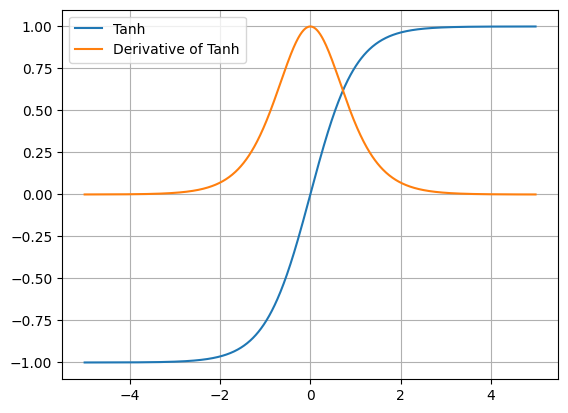

In [9]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

## 權重初始化

1. RandomNormal (std 1 )

In [10]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


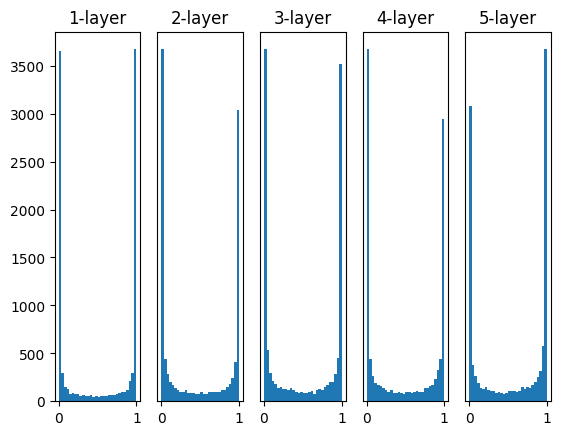

In [11]:
x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

2. RandomNormal (std 0.05 )

In [13]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

In [12]:
x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

NameError: name 'model_2' is not defined

3. Xavier/Glorot Initialization (Sigmoid)

In [14]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


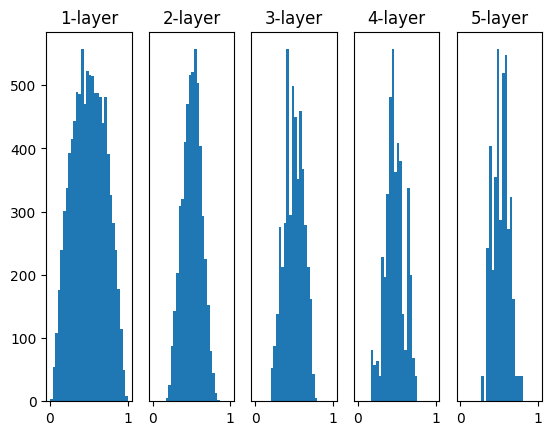

In [15]:
x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

4. Xavier/Glorot Initialization (ReLU)

In [16]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

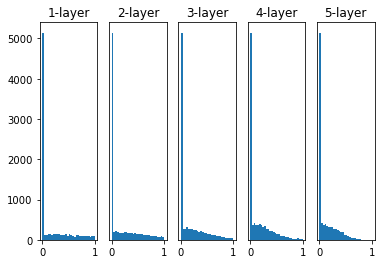

In [ ]:
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

5. He initialization

In [ ]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

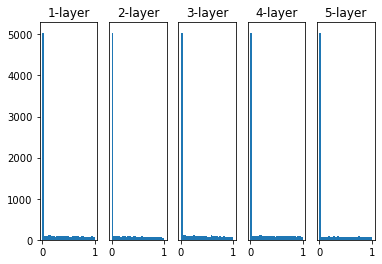

In [ ]:
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

# 實驗一：使用CIFAR-10數據集實驗證三種權重初始化方法

### Import必要套件

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
# 從資料夾中的preprocessing.py檔案中Import parse_aug_fn和parse_fn函數
from preprocessing import parse_aug_fn, parse_fn

### 讀取數據並分析
載入Cifar10數據集：

In [ ]:
# 將train Data重新分成9:1等分，分別分給train data, valid data
train_split, valid_split = ['train[:90%]', 'train[90%:]']
# 取得訓練數據，並順便讀取data的資訊
train_data, info = tfds.load("cifar10", split=train_split, with_info=True, data_dir='/home/share/dataset/tensorflow-datasets')
# 取得驗證數據
valid_data = tfds.load("cifar10", split=valid_split, data_dir='/home/share/dataset/tensorflow-datasets')
# 取得測試數據
test_data = tfds.load("cifar10", split=tfds.Split.TEST, data_dir='/home/share/dataset/tensorflow-datasets')

### Dataset 設定

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

train_data = train_data.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### 訓練網路模型

In [ ]:
def build_and_train_model(run_name, init):
    """
    run_name:傳入目前執行的任務名子
    init:傳入網路層初始化化的方式
    """
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = keras.Model(inputs, outputs)

    # 儲存訓練記錄檔
    logfiles = 'lab5-logs/{}-{}'.format(run_name, init.__class__.__name__)
    model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles,
                                            histogram_freq=1)
    # 儲存最好的網路模型權重
    modelfiles = model_dir + '/{}-best-model.h5'.format(run_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles,
                                                 monitor='val_categorical_accuracy',
                                                 save_best_only=True,
                                                 mode='max')

    # 設定訓練使用的優化器、損失函數和指標函數
    model.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

    # 訓練網路模型
    model.fit(train_data,
              epochs=100,
              validation_data=valid_data,
              callbacks=[model_cbk, model_mckp])

In [ ]:
session_num = 1
# 設定儲存權重目錄
model_dir = 'lab5-logs/models/'
os.makedirs(model_dir)
# 設定要測試的三種初始化方法
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    build_and_train_model(run_name, init)  # 創建和訓練網路
    session_num += 1

--- Running training session 1
Epoch 1/100


W0613 17:04:39.261276 140675303655232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


      1/Unknown - 8s 8s/step - loss: 2.3026 - categorical_accuracy: 0.1406

W0613 17:04:44.289539 140675303655232 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.109824). Check your callbacks.


704/704 [==============================] - 21s 30ms/step - loss: 2.1710 - categorical_accuracy: 0.1678 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 13s 18ms/step - loss: 2.0251 - categorical_accuracy: 0.2390 - val_loss: 1.9204 - val_categorical_accuracy: 0.2906
Epoch 3/100
704/704 [==============================] - 14s 20ms/step - loss: 1.9734 - categorical_accuracy: 0.2678 - val_loss: 1.8632 - val_categorical_accuracy: 0.3286
Epoch 4/100
704/704 [==============================] - 12s 18ms/step - loss: 1.9029 - categorical_accuracy: 0.2937 - val_loss: 1.7494 - val_categorical_accuracy: 0.3642
Epoch 5/100
704/704 [==============================] - 12s 17ms/step - loss: 1.8575 - categorical_accuracy: 0.3144 - val_loss: 1.6670 - val_categorical_accuracy: 0.3848
Epoch 6/100
704/704 [==============================] - 15s 21ms/step - loss: 1.8234 - categorical_accuracy: 0.3293 - val_loss: 1.5896 - val_categorical_accurac

704/704 [==============================] - 17s 25ms/step - loss: 1.1242 - categorical_accuracy: 0.6145 - val_loss: 0.8646 - val_categorical_accuracy: 0.6950
Epoch 98/100
704/704 [==============================] - 18s 25ms/step - loss: 1.1186 - categorical_accuracy: 0.6142 - val_loss: 0.8909 - val_categorical_accuracy: 0.6882
Epoch 99/100
704/704 [==============================] - 18s 25ms/step - loss: 1.1222 - categorical_accuracy: 0.6142 - val_loss: 0.8897 - val_categorical_accuracy: 0.6926
Epoch 100/100
704/704 [==============================] - 18s 26ms/step - loss: 1.1125 - categorical_accuracy: 0.6183 - val_loss: 0.8667 - val_categorical_accuracy: 0.6968
--- Running training session 2
Epoch 1/100
704/704 [==============================] - 21s 30ms/step - loss: 2.0774 - categorical_accuracy: 0.2085 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 18s 25ms/step - loss: 1.8964 - categorical_accuracy: 0.2985 - val_los

704/704 [==============================] - 12s 17ms/step - loss: 0.7922 - categorical_accuracy: 0.7351 - val_loss: 0.6495 - val_categorical_accuracy: 0.7958
Epoch 94/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7875 - categorical_accuracy: 0.7385 - val_loss: 0.6843 - val_categorical_accuracy: 0.7812
Epoch 95/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7911 - categorical_accuracy: 0.7377 - val_loss: 0.6865 - val_categorical_accuracy: 0.7842
Epoch 96/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7779 - categorical_accuracy: 0.7410 - val_loss: 0.6340 - val_categorical_accuracy: 0.8036
Epoch 97/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7941 - categorical_accuracy: 0.7349 - val_loss: 0.6557 - val_categorical_accuracy: 0.7970
Epoch 98/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7839 - categorical_accuracy: 0.7400 - val_loss: 0.6462 - val_categorical_accuracy: 

704/704 [==============================] - 12s 17ms/step - loss: 0.7448 - categorical_accuracy: 0.7559 - val_loss: 0.6218 - val_categorical_accuracy: 0.8018
Epoch 90/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7492 - categorical_accuracy: 0.7529 - val_loss: 0.6238 - val_categorical_accuracy: 0.8044
Epoch 91/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7287 - categorical_accuracy: 0.7591 - val_loss: 0.6150 - val_categorical_accuracy: 0.8050
Epoch 92/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7385 - categorical_accuracy: 0.7573 - val_loss: 0.6599 - val_categorical_accuracy: 0.7974
Epoch 93/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7449 - categorical_accuracy: 0.7571 - val_loss: 0.6348 - val_categorical_accuracy: 0.8064
Epoch 94/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7436 - categorical_accuracy: 0.7556 - val_loss: 0.6259 - val_categorical_accuracy: 

### 比較三種初始化的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

    157/Unknown - 2s 10ms/step - loss: 0.6364 - categorical_accuracy: 0.8048 1s 9ms/ste

顯示預測的損失值與準確度結果：

In [ ]:
loss = [loss_1, loss_2, loss_3]
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048


# 實驗二：使用CIFAR-10數據集實驗Batch Normalization方法

建立網路模型，這邊使用到以下幾種網路層：
- keras.Input：輸入層(輸入影像大小為32x32x3)
- layers.Conv2D：卷積層(使用3x3大小的kernel)
- layers.BatchNormalization：BatchNormalization層(使用預設參數)
- layers.ReLU：ReLU激活函數層(使用在BatchNormalization層之後)
- layers.MaxPool2D：池化層(對特徵圖下採樣)
- layers.Flatten：扁平層(特徵圖轉成一維Tensor)
- layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
- layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)

因為大部分激活函數都會在BatchNormalization之後，所以這邊的搭建與前幾個model有些差別。

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # 顯示網路架構

Model: "model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 128)       512 

建立Callback function：

In [ ]:
# 儲存訓練記錄檔
log_dir = os.path.join('lab5-logs', 'run-4-batchnormalization')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/run-4-best-model.h5',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')

設定訓練使用的優化器、損失函數和指標函數

In [ ]:
model_4.compile(keras.optimizers.Adam(),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

訓練網路模型

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=100,
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 35s 50ms/step - loss: 1.8649 - categorical_accuracy: 0.3316 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 27s 39ms/step - loss: 1.5226 - categorical_accuracy: 0.4618 - val_loss: 1.6555 - val_categorical_accuracy: 0.4566
Epoch 3/100
704/704 [==============================] - 28s 40ms/step - loss: 1.3684 - categorical_accuracy: 0.5218 - val_loss: 1.2505 - val_categorical_accuracy: 0.5728
Epoch 4/100
704/704 [==============================] - 27s 38ms/step - loss: 1.2729 - categorical_accuracy: 0.5578 - val_loss: 1.1574 - val_categorical_accuracy: 0.5860
Epoch 5/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1960 - categorical_accuracy: 0.5859 - val_loss: 1.4321 - val_categorical_accuracy: 0.5130
Epoch 6/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1375 - categorical_accuracy: 0.6075 - val_loss: 1.0611 - val_categor

704/704 [==============================] - 16s 23ms/step - loss: 0.4111 - categorical_accuracy: 0.8665 - val_loss: 0.4669 - val_categorical_accuracy: 0.8660
Epoch 98/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4177 - categorical_accuracy: 0.8646 - val_loss: 0.4314 - val_categorical_accuracy: 0.8632
Epoch 99/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4173 - categorical_accuracy: 0.8634 - val_loss: 0.5266 - val_categorical_accuracy: 0.8440
Epoch 100/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4050 - categorical_accuracy: 0.8680 - val_loss: 0.4620 - val_categorical_accuracy: 0.8510


驗證在測試集上：

In [ ]:
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss, acc = model_4.evaluate(test_data)
print('\nModel-4 Accuracy: {}%'.format(acc))

    157/Unknown - 6s 39ms/step - loss: 0.4311 - categorical_accuracy: 0.8644
Model-4 Accuracy: 0.8644000291824341%


### 比較四種網路的訓練結果

In [ ]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)
loss_4, acc_4 = model_4.evaluate(test_data)

    157/Unknown - 2s 14ms/step - loss: 0.4311 - categorical_accuracy: 0.8644

In [ ]:
loss = [loss_1, loss_2, loss_3, loss_4]
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048
3,0.431061,0.8644
